<h1 align="center">Regresión múltiple de las Captaciones de la Banca Multiple en República Dominicana</h1>
<h3 align="center">Autor: Pablo Neftali Perez Dotel</h3>
<h3 align="center">ID: 1064601</h3>

El siguiente código se enfoca en la implementación de un modelo de regresión múltiple en Python utilizando la biblioteca scikit-learn. Un modelo de regresión múltiple es una herramienta fundamental en estadísticas y análisis de datos para comprender y predecir las relaciones entre una variable dependiente y múltiples variables independientes.

En este caso nuesta variable de interés es 'balance' que es el total de captaciones de cada producto presentado a la Superintendencia de Bancos. Las variables predictoras seran 'IPC' que es el indice de precios al consumidor, 'TPM' que es la tasa de politica monetaria, la tasa de compra del dólar estadounidense del Banco Central, 'TPPP' la tasa pasiva promedio ponderada del Banco Central y el 'IMAE' que es el indice mensual de actividad económica.

In [1]:
# Librerias necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Carga de datos
data = pd.read_excel("C:/Users/pablo/OneDrive/Documentos/R/Trabajo de Investigación Final/data_reg2.xlsx")

In [5]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X = data[['IPC', 'TPM', 'DOLAR ESTADOUNIDENSE', 'TPPP', 'IMAE']]
y = data['balance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Ajusta el tamaño de prueba según tus necesidades


In [6]:
# Crear y ajustar el modelo de regresión múltiple
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

In [7]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("R cuadrado (R2):", r2)

# Coeficientes de las variables predictoras
coeficientes = modelo.coef_
intercepto = modelo.intercept_

print("Coeficientes de las variables predictoras:")
for i, col in enumerate(X.columns):
    print(f"{col}: {coeficientes[i]}")
    
print("Intercepto:", intercepto)

Error cuadrático medio (MSE): 2.3535533525166748e+24
R cuadrado (R2): 0.626827921051861
Coeficientes de las variables predictoras:
IPC: 50316364702809.4
TPM: 53939084383262.516
DOLAR ESTADOUNIDENSE: 421669082604.8281
TPPP: 17979089962387.227
IMAE: -2871061966161.0244
Intercepto: -17885555224323.53


In [8]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X = data[['IPC', 'TPM', 'DOLAR ESTADOUNIDENSE', 'TPP']]
y = data['balance']

# Agregar una constante al conjunto de datos para estimar el intercepto
X = sm.add_constant(X)

# Crear el modelo de regresión
modelo = sm.OLS(y, X).fit()

# Obtener un resumen de los resultados estadísticos
resumen = modelo.summary()

print(resumen)

                            OLS Regression Results                            
Dep. Variable:                balance   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     128.6
Date:                Fri, 13 Oct 2023   Prob (F-statistic):           1.13e-30
Time:                        21:04:45   Log-Likelihood:                -2092.1
No. Observations:                  72   AIC:                             4194.
Df Residuals:                      67   BIC:                             4206.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.229e+13 

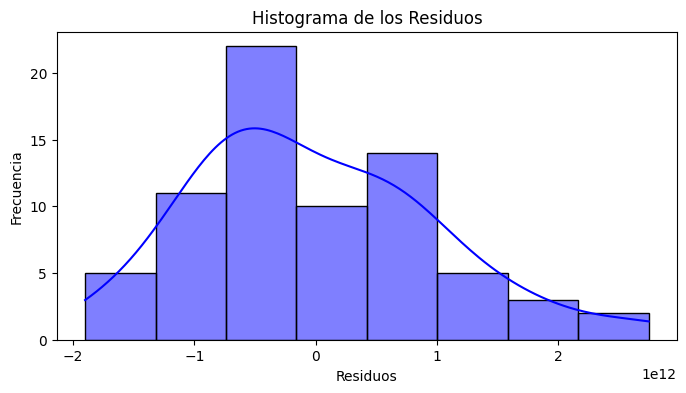

In [9]:
# Obtener los residuos del modelo
residuos = modelo.resid

# Gráfica de histograma de los residuos
plt.figure(figsize=(8, 4))
sns.histplot(residuos, kde=True, color='blue')
plt.title('Histograma de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\pablo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 800x400 with 0 Axes>

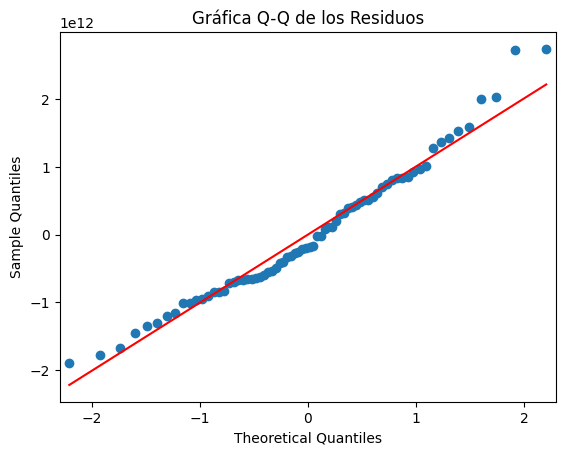

In [10]:
# Gráfica de Q-Q plot de los residuos
plt.figure(figsize=(8, 4))
sm.qqplot(residuos, line='s', color='blue')
plt.title('Gráfica Q-Q de los Residuos')
plt.show()

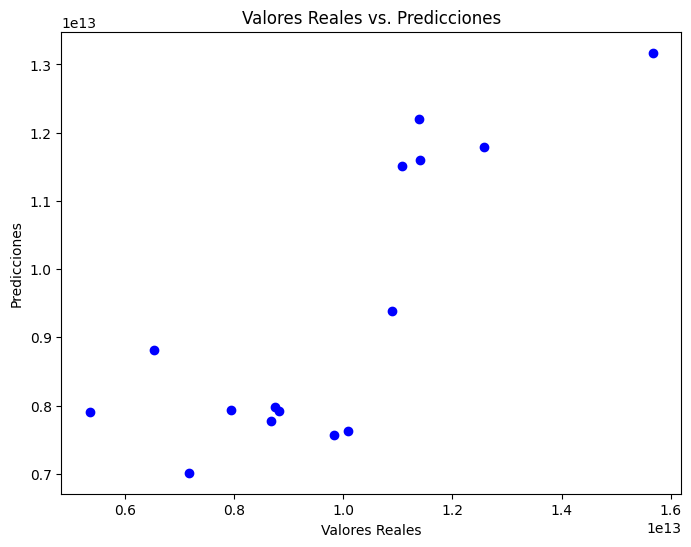

In [11]:
# Gráfica de dispersión de los valores reales vs. las predicciones
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Valores Reales vs. Predicciones')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()

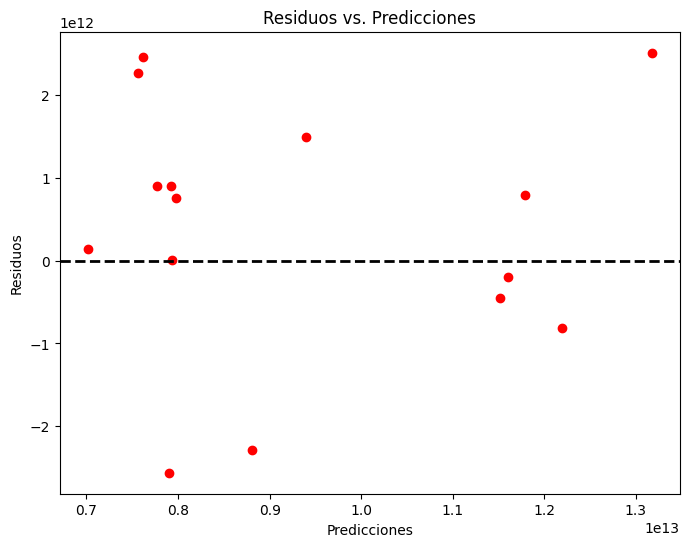

In [12]:
# Gráfica de dispersión de los residuos vs. las predicciones
residuos = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuos, color='red')
plt.title('Residuos vs. Predicciones')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.axhline(0, color='black', linestyle='--', lw=2)
plt.show()